In [10]:
import pandas
import contextily
from IPython.display import GeoJSON
import fiona
import geopandas
import osmnx


In [11]:
print(fiona.supported_drivers)

{'DXF': 'rw', 'CSV': 'raw', 'OpenFileGDB': 'r', 'ESRIJSON': 'r', 'ESRI Shapefile': 'raw', 'FlatGeobuf': 'rw', 'GeoJSON': 'raw', 'GeoJSONSeq': 'rw', 'GPKG': 'raw', 'GML': 'rw', 'OGR_GMT': 'rw', 'GPX': 'rw', 'Idrisi': 'r', 'MapInfo File': 'raw', 'DGN': 'raw', 'OGR_PDS': 'r', 'S57': 'r', 'SQLite': 'raw', 'TopoJSON': 'r'}


In [12]:
import geopandas 
file_path = "/Users/asim/Desktop/nepal_shapefiles/local_admin/local_unit.shp"
gdf = geopandas.read_file(file_path)

It is common to work with very large vector datasets, where only a subset of the data is needed. The `read_file` method in Geopandas allows for subsetting the data geospatially using a bounding box of the geometry or using row and column filters by passing extra arguments to `read_file`. For example, the following command can be used to only load the dataset that matches a specific filter for the DISTRICT field:

In [13]:
gdf_bhaktapur = geopandas.read_file(
    file_path,
    where="DISTRICT='BHAKTAPUR'",
)

In [14]:
gdf.head()

,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51272 27.56894, 87.51255 27.56859..."
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.68850 27.70975, 87.68891 27.70938..."
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


<AxesSubplot: >

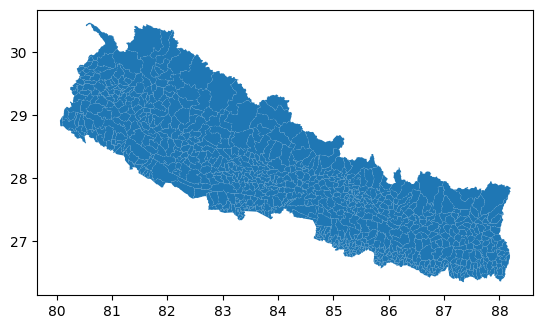

In [15]:
gdf.plot()

 Reading file from URLs

It is also possible to load data into Geopandas directly from a web URL using the read_file() method. This feature is particularly useful when the data is hosted on a web service, such as a geoserver. In this tutorial, we will be working with data that is accessible through a geoserver running on the GeodataNepal website. To load this data into Geopandas, we simply need to provide the URL for the data source as the argument to the read_file() method. This will enable Geopandas to fetch the data directly from the source and create a GeoDataFrame object.


In [16]:
url = """https://geodatanepal.com/wfs?service=wfs&version=2.0.0&request=GetFeature&typeNames=nepal:local_unit&outputFormat=json"""

In [17]:
gdf= geopandas.read_file(url)

In [19]:
gdf.head()

,id,state_code,district,gapa_napa,type_gn,province,geometry
0,local_unit.1,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"MULTIPOLYGON (((87.60985 27.37043, 87.61107 27..."
1,local_unit.8,1,TAPLEJUNG,Sirijangha,Gaunpalika,1,"MULTIPOLYGON (((88.14802 27.66980, 88.14800 27..."
2,local_unit.23,1,ILAM,Maijogmai,Gaunpalika,1,"MULTIPOLYGON (((88.07931 27.03516, 88.07967 27..."
3,local_unit.24,1,ILAM,Mangsebung,Gaunpalika,1,"MULTIPOLYGON (((87.76702 26.92401, 87.76702 26..."
4,local_unit.25,1,ILAM,Rong,Gaunpalika,1,"MULTIPOLYGON (((88.02346 26.84990, 88.02380 26..."


### Retrieving data from Open Street Map

OpenStreetMap (OSM) is a collaborative, open-source project that creates a free and editable map of the world. Anyone can contribute to it, and the resulting map is available under a free license. OSM data can be useful for geospatial analysis due to its global coverage, recent updates, and open access. 

OpenStreetMap-based toolkit (OSMnx), commonly known as OSMnx, is a Python library that allows us download OSM data for a specific geographic area and filter it by various parameters such as location, building type, and amenity. In this tutorial, we will use the geometry data for the Bhaktapur district that we read into Python earlier. The following code illustrates how to to retrieve building footprints using osmnx.geometries_from_polygon() for the specific polygon of Bhaktapur, filtered by a particular tag:

In [20]:
import osmnx
gdf_blgs = osmnx.geometries_from_polygon(
    gdf_bhaktapur.unary_union, tags={"shop": "supermarket"}
)

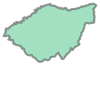

In [21]:
gdf_bhaktapur.unary_union

The unary_union returns the union of the geometry of all the polygons in Bhaktapur GeoDataFrame, thus providing the input polygon boundary for the geometries_from_polygon()function. tags={"shop": "supermarket"} parameter filters the OSM data to only retrieve building footprints that have the specified tag key and value pair, in this case, "shop" equal to "supermarket". This restricts the query to only return building footprints that have been tagged as supermarkets in OSM. The resulting GeoDataFrame is assigned to the variable df_blgs. 

To retrieve "temple" data instead of "supermarket" data in the previous code example, you can specify the tags parameter as {"building": "temple"}. This will filter the OpenStreetMap data to only retrieve building footprints that have been tagged as temples. This demonstrates how easy it is to customize the OSM data retrieval process in OSMnx to fit specific needs.

In [22]:
gdf_temples = osmnx.geometries_from_polygon(
    gdf_bhaktapur.unary_union, tags={"building": "temple"}
)

### Vizualization of vector data

The vector data imported from various sources into a GeoDataFrame can be visualized by employing several methods. One simple way is to use the plot() method, which allows us to create basic visualizations of the data.

<AxesSubplot: >

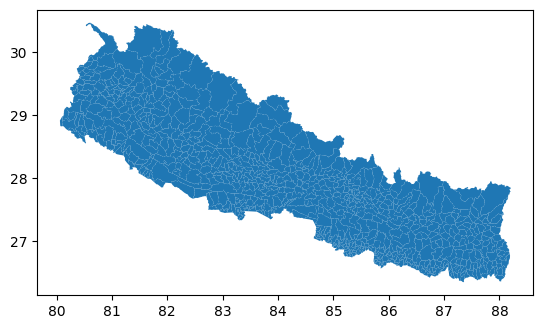

In [23]:
gdf.plot()

In [ ]:
gdf.explore()

we can also color-code the map based on the values of a specific column in the GeoDataFrame. In the GeoDataFrame, we have a column that specifies the state code representing Nepal's states for each polygon. By passing this column to the explore() method, we can visualize the map as different categories, with each state represented by a different color.



In [ ]:
gdf.explore(column='state_code',categorical = True, style_kwds=dict(color="black",weight=2, opacity=0.4))

This parameter allows us to specify the styling options for the map. In this case, we are using a dictionary (dict) to specify the options. The color option sets the color of the borders of the polygons to black. The weight option sets the thickness of the borders to 2 pixels. The opacity option sets the opacity of the polygons to 0.4, which means they will be somewhat transparent.

in the above, we saw overlaying a polygon map on top of a basemap. there might be a situation where we want to overlay geometries from multiple geodataframe. We can accomplish that using contextily library as below.
g

In [129]:
#gdf.set_geometry('geometry')
gdf.crs 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [155]:
gpd

,id,dist_code,dist_name,shape_area,shape_len,geometry
0,district.1,56,Humla,0.563069,4.716705,"MULTIPOLYGON (((81.39931 30.35919, 81.39867 30..."
1,district.2,72,Darchula,0.218681,2.558935,"MULTIPOLYGON (((81.09047 30.05482, 81.08816 30..."
2,district.3,69,Bajhang,0.324637,2.885682,"MULTIPOLYGON (((81.09047 30.05482, 81.09086 30..."
3,district.4,53,Mugu,0.300001,3.600518,"MULTIPOLYGON (((82.49875 29.95081, 82.50055 29..."
4,district.5,67,Bajura,0.212234,2.661084,"MULTIPOLYGON (((81.50617 29.89602, 81.50912 29..."
...,...,...,...,...,...,...
70,district.71,16,Siraha,0.111173,1.593846,"MULTIPOLYGON (((86.26038 26.91732, 86.26049 26..."
71,district.72,15,Saptari,0.125781,1.926604,"MULTIPOLYGON (((87.02446 26.71809, 87.02404 26..."
72,district.73,09,Morang,0.165868,1.906865,"MULTIPOLYGON (((87.58765 26.86056, 87.58827 26..."
73,district.74,10,Sunsari,0.113622,1.737671,"MULTIPOLYGON (((87.34716 26.84787, 87.34777 26..."


In [93]:
gdf_blgs.to_crs(epsg=4326, inplace = True)

<AxesSubplot: >

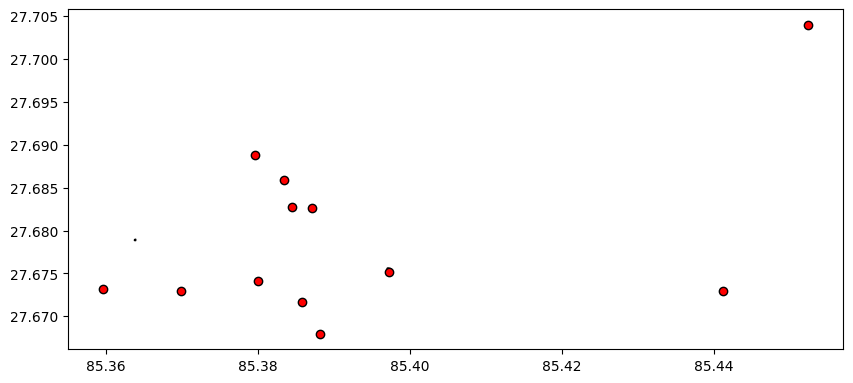

In [110]:
gdf_blgs.plot(color='red', figsize=(10, 10))

In [108]:
ax = gdf_bhaktapur.explore( style_kwds=dict(color="black",weight=2, opacity=0.4))
gdf_blgs.plot(ax=ax, color='red')

AttributeError: 'Map' object has no attribute 'set_aspect'

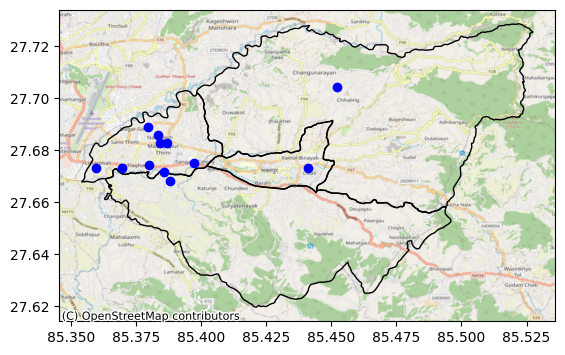

In [139]:
import contextily
ax = gdf_bhaktapur.plot(
    facecolor="none", edgecolor="k", linewidth=1)
gdf_blgs.plot(ax=ax, color='blue')
contextily.add_basemap(ax,crs=gdf_blgs.crs, source=contextily.providers.OpenStreetMap.Mapnik)



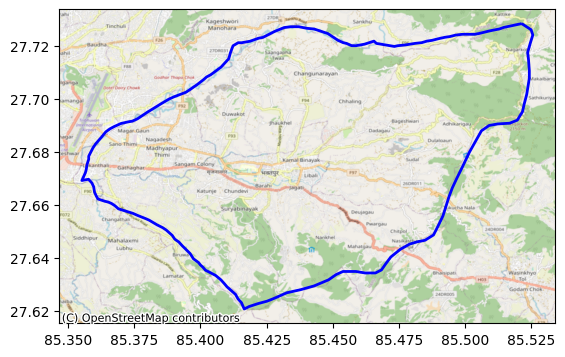

In [158]:
ax = smallest.plot(
    facecolor="none", edgecolor="blue", linewidth=2)
ax.set_aspect('equal')
    
args = list(map(lambda x: x.to_crs(epsg=4326), args))

contextily.add_basemap(
    ax, 
    crs=smallest.crs, 
    source=contextily.providers.OpenStreetMap.Mapnik
);

In [ ]:
args = list(map(lambda x: x.to_crs(epsg=4326), args))
    # Create figure
    fig, ax = plt.subplots(1, figsize=(20, 20))
    #Set aspect to equal
    ax.set_aspect('equal')
    
    # PLOTTING: Specify layers to plot how to format each layer (colours, transparency, etc.):
    # Layer 1:
    args[0].boundary.plot(ax=ax, color='blue', edgecolor='k', alpha=0.5, zorder=1)
    # Layer 2:
    args[1].plot(ax=ax, color='blue', alpha=0.5, zorder=2)

In [22]:
import osmnx as ox

In [23]:
blgs = ox.geometries_from_polygon(
    bhaktapur.squeeze().geometry, tags={"shop": "supermarket"}
)

temples = ox.geometries_from_polygon(
    bhaktapur.squeeze().geometry, tags={"building": "temple"}
)

In [31]:
gdf.explore()

<AxesSubplot: >

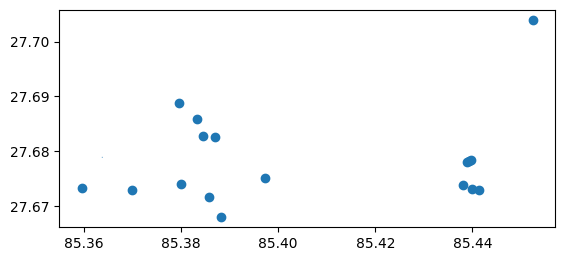

In [174]:
blgs.plot()

In [182]:
blgs.explore()

In [179]:
!pip install folium matplotlib mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 1.9 MB/s eta 0:00:00a 0:00:01
